In [2]:
# Import Libraries
import pandas as pd


In [3]:
# Import Dataset
dataset = pd.read_csv('training_data.csv')
X_train=dataset.iloc[:,0:5].values
y_train=dataset.iloc[:,5].values

In [4]:
dataset.head()

Cycle  Time Measured(Sec)  Voltage Measured(V)  Current Measured  \
0      0            3690.234             2.475768         -2.009436   
1      0            3690.234             3.062113         -0.001433   
2      0            3434.891             3.053230         -0.002433   
3      1            3672.344             2.351526         -2.010375   
4      1            3672.344             3.079226         -0.003230   

   Temperature Measured  Capacity(Ah) SampleId  
0             39.162987      2.035338    B0006  
1             37.338478      1.891052    B0007  
2             37.205671      1.855005    B0018  
3             39.246203      2.025140    B0006  
4             37.161739      1.880637    B0007

In [5]:
test_data = pd.read_csv('testing_data.csv')
X_005=test_data.iloc[:,0:5].values
y_005=test_data.iloc[:,5].values
# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)'

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train_scaled = sc.fit_transform(X_train)
X_005 = sc.transform(X_005)
X_005_scaled = sc.transform(X_005)


In [11]:
# Import keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
import matplotlib.pyplot as plt
# Initializing the ANN
regressor = Sequential()

# Adding the input layer and first hidden layer
regressor.add(Dense(units=10, kernel_initializer='uniform', activation='tanh', input_dim=5))
regressor.add(Dense(units=5, kernel_initializer='uniform', activation='tanh'))

# Adding the output layer
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compiling the ANN with custom metric
import keras.backend as K

def threshold_accuracy(y_true, y_pred):
    threshold = 0.5  # Define your threshold here
    y_pred_binary = K.cast(K.greater(y_pred, threshold), dtype='float32')
    y_true_binary = K.cast(K.greater(y_true, threshold), dtype='float32')
    accuracy = K.mean(K.equal(y_true_binary, y_pred_binary))
    return accuracy

regressor.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error', threshold_accuracy])

# Fitting the ANN to the Training set
history = regressor.fit(X_train_scaled, y_train, batch_size=1, epochs=20)

# Predicting the Test set results
y_pred = regressor.predict(X_005_scaled)

Epoch 1/20
468/468 [==============================] - 2s 1ms/step - loss: 0.1766 - mean_absolute_error: 0.2825 - threshold_accuracy: 0.9615
Epoch 2/20
468/468 [==============================] - 1s 1ms/step - loss: 0.0380 - mean_absolute_error: 0.1667 - threshold_accuracy: 1.0000
Epoch 3/20
468/468 [==============================] - 1s 2ms/step - loss: 0.0232 - mean_absolute_error: 0.1279 - threshold_accuracy: 1.0000
Epoch 4/20
468/468 [==============================] - 1s 2ms/step - loss: 0.0034 - mean_absolute_error: 0.0438 - threshold_accuracy: 1.0000
Epoch 5/20
468/468 [==============================] - 1s 2ms/step - loss: 0.0017 - mean_absolute_error: 0.0304 - threshold_accuracy: 1.0000
Epoch 6/20
468/468 [==============================] - 1s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0282 - threshold_accuracy: 1.0000
Epoch 7/20
468/468 [==============================] - 1s 2ms/step - loss: 0.0012 - mean_absolute_error: 0.0266 - threshold_accuracy: 1.0000
Epoch 8/20
468/468 [

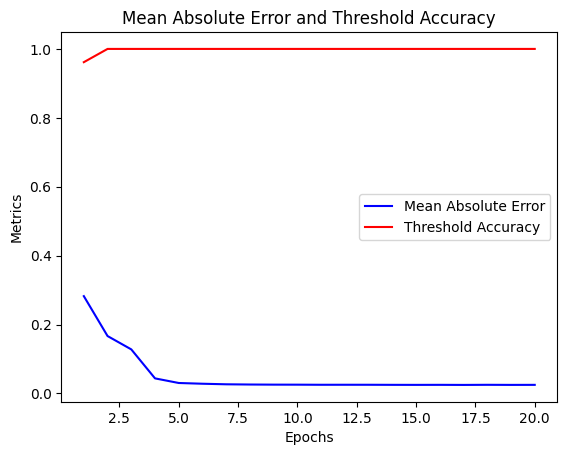

In [17]:
# Extracting MAE and accuracy for each epoch
mae_history = history.history['mean_absolute_error']
accuracy_history = history.history['threshold_accuracy']

# Plotting MAE and accuracy for each epoch
epochs = range(1, len(mae_history) + 1)

plt.plot(epochs, mae_history, 'b', label='Mean Absolute Error')
plt.plot(epochs, accuracy_history, 'r', label='Threshold Accuracy')
plt.title('Mean Absolute Error and Threshold Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

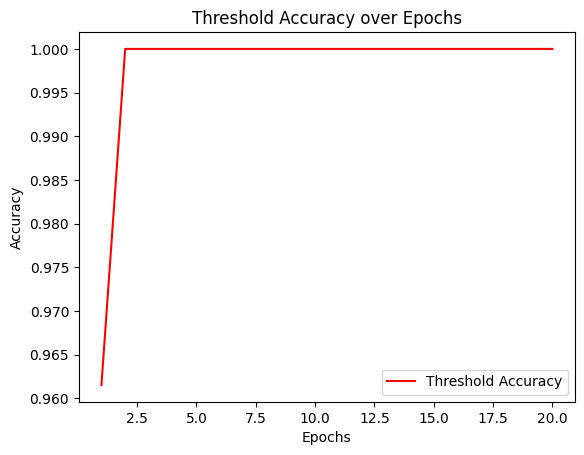

In [18]:
# Plotting accuracy for each epoch
epochs = range(1, len(accuracy_history) + 1)

plt.plot(epochs, accuracy_history, 'r', label='Threshold Accuracy')
plt.title('Threshold Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 32ms/step


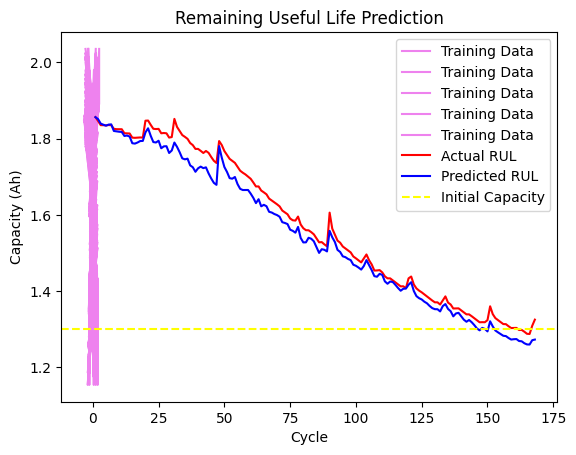

In [19]:
import matplotlib.pyplot as plt

# Reshape the input data to match the model's input shape
listt = X_005[0].reshape(1, -1)

# Predict the initial capacity
init_capacity = 0.7 * regressor.predict(listt)[0][0]

# Generate input values for plotting
x_inp = list(range(1, len(y_pred) + 1))

# Plotting
plt.plot(X_train, y_train, color='violet', label='Training Data')  # Corrected color name
plt.plot(x_inp, y_005, color='red', label='Actual RUL')
plt.plot(x_inp, y_pred, color='blue', label='Predicted RUL')
plt.title('Remaining Useful Life Prediction')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')

# Plot the initial capacity as a horizontal line
plt.axhline(y=init_capacity, color='yellow', linestyle='--', label='Initial Capacity')
plt.legend()

plt.show()


In [20]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R^2 score
R2 = r2_score(y_005, y_pred)

# Calculate RMSE
mse = mean_squared_error(y_005, y_pred)
rmse = np.sqrt(mse)

print("R^2 Score:", R2)
print("Root Mean Square Error (RMSE):", rmse)

accuracy_percentage = R2 * 100

print("Prediction Accuracy (R^2) Score:", accuracy_percentage, "%")
print(y_pred)


R^2 Score: 0.9749307798095642
Root Mean Square Error (RMSE): 0.03005869213688425
Prediction Accuracy (R^2) Score: 97.49307798095643 %
[[1.8562607]
 [1.8512166]
 [1.8394061]
 [1.8365208]
 [1.8339679]
 [1.8367897]
 [1.837381 ]
 [1.820092 ]
 [1.8189609]
 [1.8180684]
 [1.8175108]
 [1.8069931]
 [1.8080819]
 [1.8053757]
 [1.7879292]
 [1.7869623]
 [1.789787 ]
 [1.7936404]
 [1.7940183]
 [1.8164269]
 [1.8270926]
 [1.8074552]
 [1.7909675]
 [1.7898372]
 [1.7944864]
 [1.7746885]
 [1.779747 ]
 [1.7800691]
 [1.7623501]
 [1.7688417]
 [1.7897263]
 [1.7784126]
 [1.7643425]
 [1.7482636]
 [1.7456284]
 [1.747447 ]
 [1.7298235]
 [1.7249483]
 [1.713036 ]
 [1.7221154]
 [1.7265602]
 [1.7225465]
 [1.7246499]
 [1.7086629]
 [1.695363 ]
 [1.6839612]
 [1.6787553]
 [1.7802472]
 [1.7503082]
 [1.7255801]
 [1.7125123]
 [1.6963012]
 [1.6948497]
 [1.6993823]
 [1.6806759]
 [1.668255 ]
 [1.6651375]
 [1.6652291]
 [1.6652625]
 [1.6556681]
 [1.6446049]
 [1.6307806]
 [1.6410639]
 [1.6224086]
 [1.6262808]
 [1.6226516]
 [1.6080

In [ ]:
The above graph was plotted by training the NN by giving all the input parameters i.e
cycle number,voltage,current,temperature and time. The capacity prediction gives a decent accuracy.
As per the methodology implemented in the above mentioned research paper, capacity was predicted
only using cycle number. The accuracy of predicted capacity was measured using R square(R2) and
root mean square error (RMSE) functions.
The values for the obtained errors are as follows:
R2 = 0.942
RMSE = 0.045

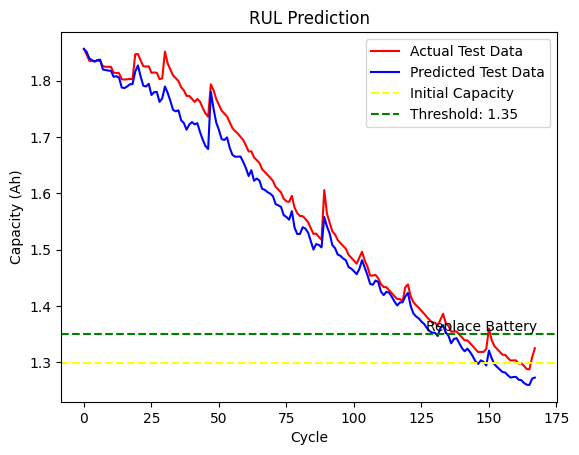

In [21]:
# Set threshold value
threshold = 1.35  # Adjust this threshold value as needed

# Plotting
plt.plot(range(len(y_005)), y_005, color='red', label='Actual Test Data')
plt.plot(range(len(y_pred)), y_pred, color='blue', label='Predicted Test Data')
plt.axhline(init_capacity, color='yellow', linestyle='--', label='Initial Capacity')
plt.axhline(threshold, color='green', linestyle='--', label=f'Threshold: {threshold}')
plt.title('RUL Prediction')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.legend()

# Annotation for threshold crossing
if y_pred[-1] < threshold:
    plt.text(len(y_pred), threshold, 'Replace Battery', ha='right', va='bottom', color='black')
else:
    plt.text(len(y_pred), threshold, 'Use Battery', ha='right', va='bottom', color='green')

plt.show()


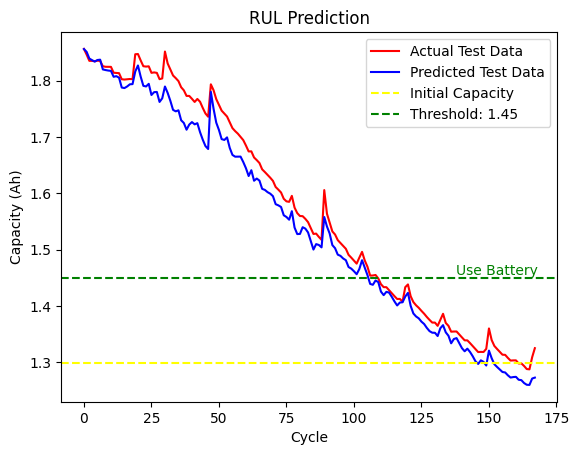

In [22]:
# Set threshold value
threshold = 1.45  # Adjust this threshold value as needed

# Plotting
plt.plot(range(len(y_005)), y_005, color='red', label='Actual Test Data')
plt.plot(range(len(y_pred)), y_pred, color='blue', label='Predicted Test Data')
plt.axhline(init_capacity, color='yellow', linestyle='--', label='Initial Capacity')
plt.axhline(threshold, color='green', linestyle='--', label=f'Threshold: {threshold}')
plt.title('RUL Prediction')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.legend()

# Annotation for threshold crossing
if y_pred[1] < threshold:
    plt.text(len(y_pred), threshold, 'Replace Battery', ha='right', va='bottom', color='black')
else:
    plt.text(len(y_pred), threshold, 'Use Battery', ha='right', va='bottom', color='green')

plt.show()
